In [1]:
!pip install split-folders tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import splitfolders
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import zipfile,os



Input Folder untuk dibagi menjadi train dan val

In [4]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/skripsi/uang'

# Preprocessing

In [5]:
splitfolders.ratio(
    base_dir,
    output='ready_dataset',
    ratio=(.7, 0.1,0.2)
)

Copying files: 300 files [00:04, 61.93 files/s] 


Menambahkan masing masing folder untuk train dan validation

In [6]:
train_dir = 'ready_dataset/train'
val_dir = 'ready_dataset/val' 
test_dir = 'ready_dataset/test'

os.listdir(test_dir)

['Uang seratus ribu', 'Uang lima puluh ribu', 'Uang sepuluh ribu']

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
#def to_grayscale_then_rgb(image):
    #original = tf.constant([[[32, 150, 3.0]]])
    #image = tf.image.rgb_to_grayscale(image)
    #return image 

In [9]:
# augmentasi gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20, # memutar gambar
                    brightness_range=(0.5,1.0), # value < 1 lebih gelap
                    shear_range=0.2, # untuk mengatur skala image
                    zoom_range=(0.8,1.0), # value < 1 akan zoom in
                    fill_mode='nearest', # untuk mengisi gambar atau wadah yang tidak memiliki nilai
                    #preprocessing_function=to_grayscale_then_rgb,
                    horizontal_flip=True,
                    vertical_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data train
    target_size=(150,150), # mengubah resolusi seluruh gambar jadi 150*150
    batch_size=32,# untuk menentukan jumlah image yang akan dimasukkan ke dalam steps training
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 210 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


# Visualisasi

In [11]:
class_name = ['Uang lima puluh ribu', 'Uang sepuluh ribu', 'Uang seratus ribu']

In [12]:
image, label = train_generator.next()

### Jumlah Keseluruhan Data

#### Pallet warna Visualisasi

In [13]:
palette1 = list(reversed(sns.color_palette("mako", 7).as_hex()))
palette2 = list(reversed(sns.color_palette("viridis", 7).as_hex()))
palette3 = list(reversed(sns.color_palette("cubehelix", 7).as_hex()))
palette4 = list(reversed(sns.color_palette("icefire", 7).as_hex()))

#### Jumlah Data Semuanya

In [14]:
len(image)

32

In [15]:
label

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [16]:
print(image.shape)

(32, 150, 150, 3)


In [17]:
# gambar = tf.reshape(image[3],(150,150))

In [18]:
#plt.imshow(gambar)

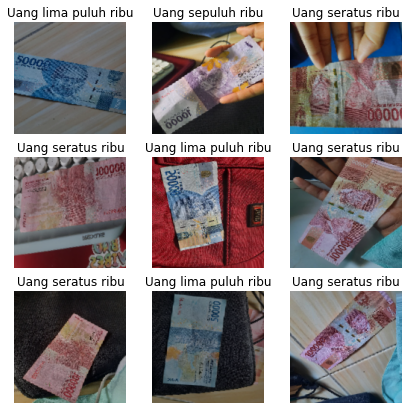

In [19]:
plt.figure(figsize=(7,7))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[i])
  plt.title(class_name[np.argmax(label[i])])
  plt.axis("off")


(32, 150, 150, 3)


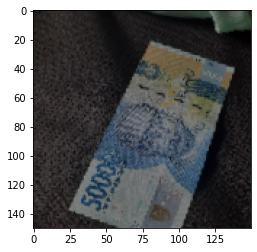

(32, 150, 150, 3)


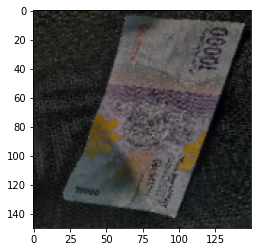

(32, 150, 150, 3)


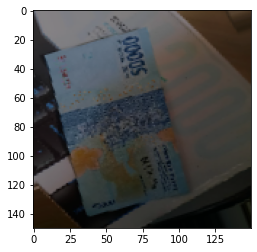

(32, 150, 150, 3)


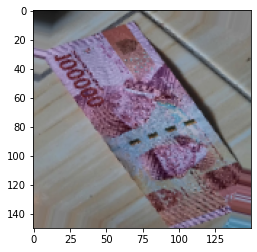

(32, 150, 150, 3)


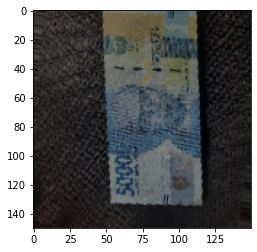

(18, 150, 150, 3)


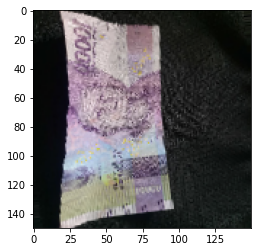

(32, 150, 150, 3)


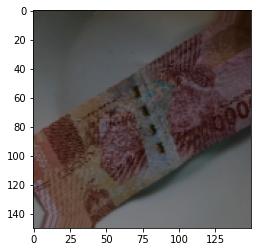

In [20]:
for _ in range(7):
  img, label = train_generator.next() # method mengembalikkan data
  print(img.shape)   #  (1,256,256,3)
  plt.imshow(img[i])
  plt.show()

# Modeling

In [21]:
from tensorflow import keras

In [22]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)), #input layer
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') # output Layer
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

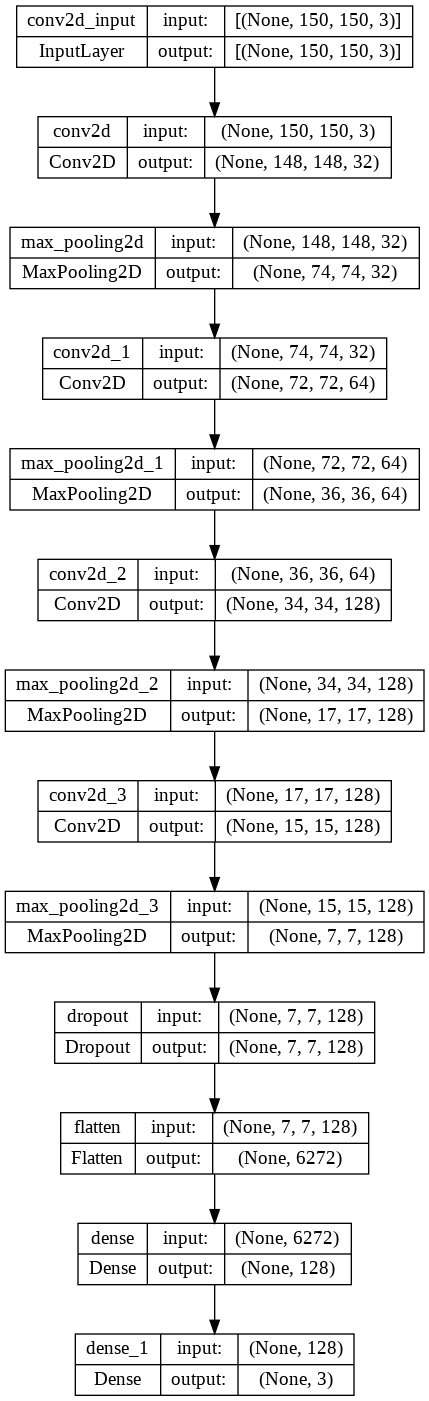

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model,'model.png',show_shapes=True)

In [25]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Training

In [26]:
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator, # untuk akurasi pengujian data
)

Epoch 1/15
7/7 [==============================] - 20s 3s/step - loss: 1.1272 - accuracy: 0.3571 - val_loss: 1.0841 - val_accuracy: 0.3333
Epoch 2/15
7/7 [==============================] - 18s 2s/step - loss: 1.0638 - accuracy: 0.4286 - val_loss: 0.8913 - val_accuracy: 0.6000
Epoch 3/15
7/7 [==============================] - 18s 2s/step - loss: 0.9945 - accuracy: 0.4905 - val_loss: 0.7978 - val_accuracy: 0.5667
Epoch 4/15
7/7 [==============================] - 20s 3s/step - loss: 0.8834 - accuracy: 0.5857 - val_loss: 0.7263 - val_accuracy: 0.7667
Epoch 5/15
7/7 [==============================] - 20s 3s/step - loss: 0.7912 - accuracy: 0.6476 - val_loss: 0.7449 - val_accuracy: 0.5667
Epoch 6/15
7/7 [==============================] - 18s 2s/step - loss: 0.7134 - accuracy: 0.6476 - val_loss: 0.7231 - val_accuracy: 0.6667
Epoch 7/15
7/7 [==============================] - 18s 2s/step - loss: 0.6128 - accuracy: 0.7429 - val_loss: 0.5059 - val_accuracy: 0.8333
Epoch 8/15
7/7 [==================

### Visualisasi Akurasi

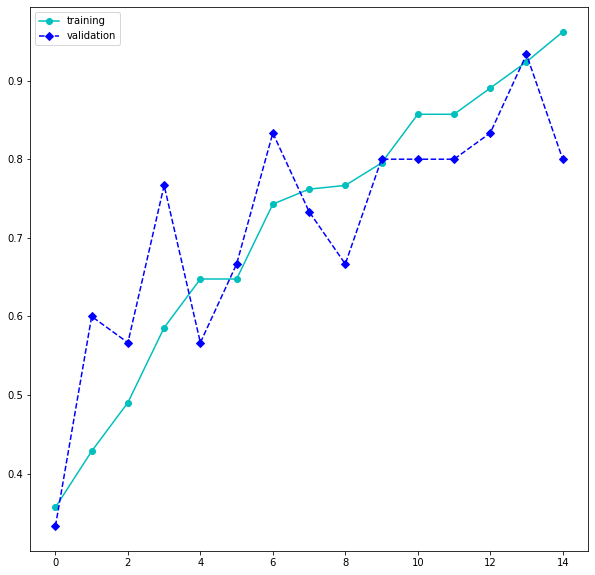

In [27]:
plt.figure(1, figsize=(10,10))
plt.plot(range(len(history.history['accuracy'])), 
         history.history['accuracy'],
         'co-',
         label='training')
plt.plot(range(len(history.history['val_accuracy'])), 
         history.history['val_accuracy'],
         'bD--',
         label='validation')
plt.legend()
plt.show()

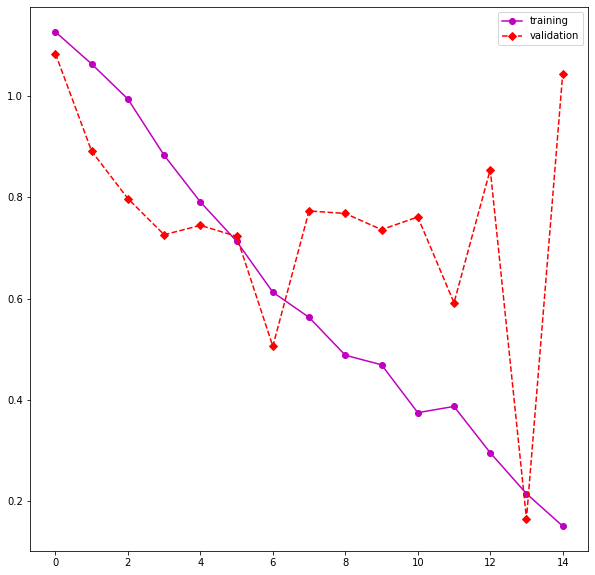

In [28]:
plt.figure(1, figsize=(10,10))
plt.plot(range(len(history.history['loss'])), 
         history.history['loss'],
         'mo-',
         label='training')
plt.plot(range(len(history.history['val_loss'])), 
         history.history['val_loss'],
         'rD--',
         label='validation')
plt.legend()
plt.show()

### Save Model diatas

In [29]:
model.save('/capstone/Save Model')
model.save('capstone/Save Model.h5')

# Evaluate

In [30]:
test_evaluate = model.evaluate(test_generator, verbose=0)

print(f'Test loss     : {test_evaluate[0]}')
print(f'Test accuracy : {round(test_evaluate[1],2)}') #dibulatkan 2 artinya 2 angka di belakang koma

Test loss     : 0.565534234046936
Test accuracy : 0.85


# Preview Hasil Prediksi

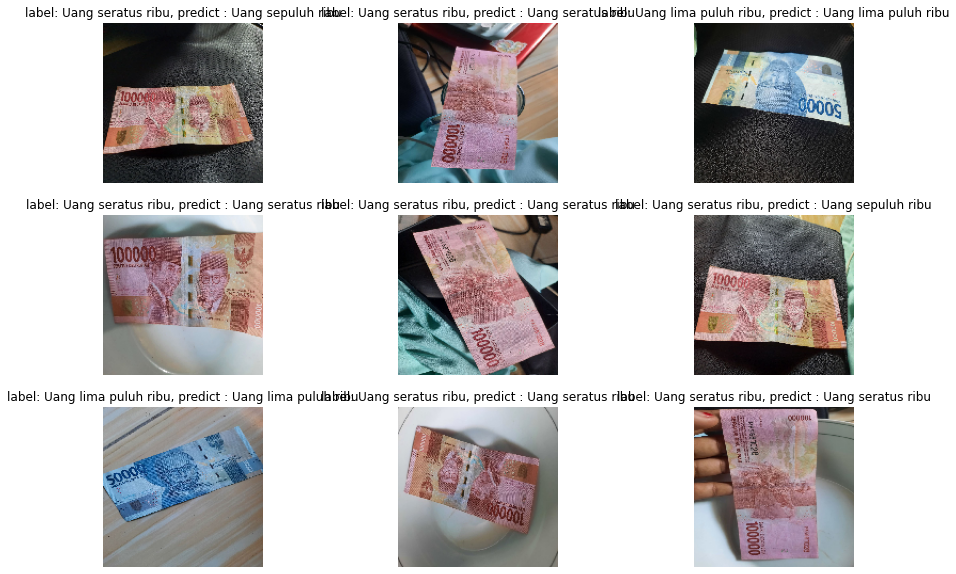

In [31]:
image ,label = next(iter(test_generator))

plt.figure(figsize=(15,10))
for i in range(9) :
    TrueLabel = class_name[np.argmax(label[i])]
    plt.subplot(3,3,i+1)
    plt.axis('off')
    y_pred = np.argmax(model.predict(image[i][None,...],verbose=0))
    plt.imshow(tf.squeeze(image[i]))
    plt.title(f'label: {TrueLabel}, predict : {class_name[y_pred]}')

# Prediksi Error

# Classification report dan Confusin Matrix

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [33]:
y_pred = model.predict(test_generator)

2/2 [==============================] - 3s 949ms/step


In [34]:
y_pred

array([[3.53663415e-03, 5.37552714e-01, 4.58910614e-01],
       [5.80428150e-09, 9.70724432e-05, 9.99902904e-01],
       [9.99631941e-01, 3.68067878e-04, 5.99819638e-10],
       [3.63601081e-04, 5.96296927e-03, 9.93673325e-01],
       [2.39963116e-09, 3.11761629e-04, 9.99688268e-01],
       [4.23540035e-03, 5.54923475e-01, 4.40841049e-01],
       [9.99999940e-01, 6.35894315e-09, 1.43833422e-18],
       [8.12040889e-06, 1.32960745e-03, 9.98662233e-01],
       [1.00931011e-07, 7.52088163e-05, 9.99924600e-01],
       [5.69998205e-01, 4.30000544e-01, 1.17112836e-06],
       [9.96153891e-01, 3.84614151e-03, 4.38558700e-09],
       [9.99999940e-01, 4.13820422e-10, 3.04416930e-22],
       [6.05295591e-10, 4.65326309e-07, 9.99999464e-01],
       [1.34000883e-01, 8.65956903e-01, 4.19985590e-05],
       [9.99999940e-01, 1.67758543e-10, 1.07749161e-20],
       [5.88084050e-02, 9.41169560e-01, 2.20315924e-05],
       [9.99999464e-01, 2.25974503e-07, 2.33290493e-07],
       [2.44608805e-01, 7.55080

In [35]:
y_predict = np.argmax(y_pred, axis=1)

In [36]:
print(classification_report(test_generator.labels, y_predict, target_names = class_name))

                      precision    recall  f1-score   support

Uang lima puluh ribu       0.27      0.35      0.30        20
   Uang sepuluh ribu       0.29      0.25      0.27        20
   Uang seratus ribu       0.29      0.25      0.27        20

            accuracy                           0.28        60
           macro avg       0.29      0.28      0.28        60
        weighted avg       0.29      0.28      0.28        60



# Confusion Matrix

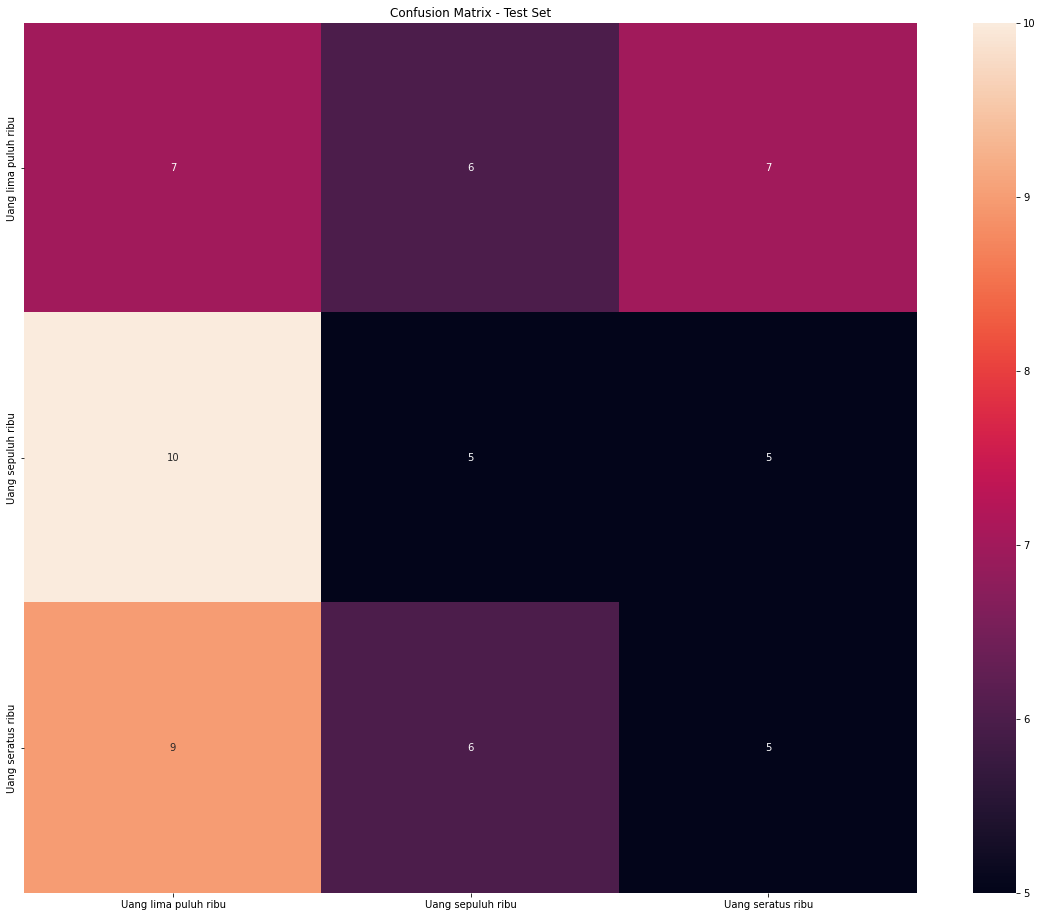

In [37]:
plt.figure(figsize=(20, 16))
cm = confusion_matrix(test_generator.labels, y_predict)

sns.heatmap(cm,annot=True,fmt='d',xticklabels=class_name,yticklabels=class_name)
plt.title("Confusion Matrix - Test Set")
plt.show()

# Mencoba Program dengan upload data gambar untuk di cek hasilnya

In [38]:
#  upload = files.upload() buat pas make google colab

In [39]:
# # from google.colab import files
# from tkinter import Tk
# from tkinter.filedialog import askopenfilename
# from tensorflow.keras.utils import load_img
# from keras.preprocessing import image
# from tensorflow.keras.preprocessing.image import img_to_array
# import matplotlib.image as mpimg
# import numpy as np
# %matplotlib inline
# import tensorflow as tf
# import matplotlib.pyplot as plt
# import numpy as np
# import seaborn as sns
# import splitfolders
# import os
# from sklearn.model_selection import train_test_split
# import tensorflow as tf
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import keras_preprocessing
# from keras_preprocessing import image
# from keras_preprocessing.image import ImageDataGenerator
# import zipfile,os

In [54]:
# from google.colab import files
from tkinter import Tk
from tkinter.filedialog import askopenfilename
from tensorflow.keras.utils import load_img
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline
from google.colab import drive
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

import os

from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import zipfile,os


In [55]:
!pip install gtts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
!pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
from playsound import playsound
from gtts import gTTS
import os
from IPython.display import Audio 


In [58]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [59]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data) 
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # save image
  cv2.imwrite(filename, img)

  return filename

<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


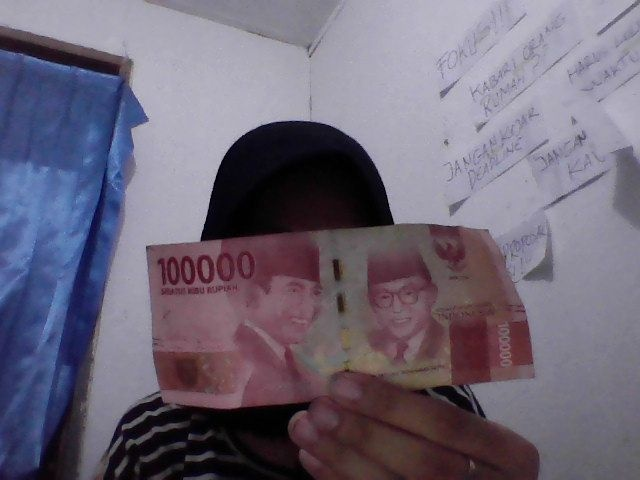

In [62]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

|===========================================|
|              PREDIKSI GAMBAR              |
|===========================================|
1/1 [==============================] - 0s 32ms/step
photo.jpg
seratus
|===========================================|


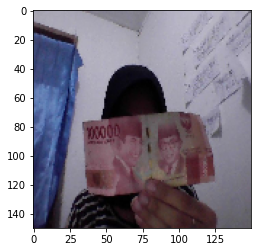

In [63]:
print("|===========================================|")
print("|              PREDIKSI GAMBAR              |")
print("|===========================================|")

img = image.load_img(filename, target_size=(150, 150))                              
imgplot = plt.imshow(img)                                                     
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

Gambar = np.vstack([x])
File = model.predict(Gambar, batch_size=10)
print(filename)

if File[0][0]==1:
  def limapuluh():
    output = gTTS('uang lima puluh', lang='id',slow = False) 
    output.save('lima puluh.mp3')
   # playsound("seribu.mp3")
    print("lima puluh")
  limapuluh()
elif File[0][1]==1:
  def sepuluhu():
    output = gTTS('uang sepuluh ribu', lang='id',slow = False) 
    output.save('sepuluh.mp3') 
   # playsound("seribu.mp3") 
    print("sepuluh")
  sepuluhu()         
elif File[0][2]==1:
  def seratus():
    output = gTTS('uang seratus', lang='id',slow = False) 
    output.save('seratus.mp3')
   # playsound("seribu.mp3")  
    print("seratus")
  seratus()                                 
else:
  def eror():
    output = gTTS('Gambar Tidak di ketahui', lang='id',slow = False) 
    output.save('eror.mp3')
    playsound("eror.mp3")
    print('Gambar Tidak di ketahui')  
  eror()       
print("|===========================================|")
